In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df = pd.read_csv('d:\srishti\downloads\salary_data.csv')

no = list(range(1,31))
df['rand'] = np.random.choice(no, 30, replace=False)

In [4]:
#import random
#random.sample(no, 4)

In [47]:
df =df.sort_values(by =['rand']).reset_index(drop = True)
df_train = df[df.rand <=20].copy()

x = df_train.YearsExperience
y = df_train.Salary
xmean= df_train['YearsExperience'].mean()
ymean= df_train['Salary'].mean()
x_xmean= x - xmean
y_ymean= y - ymean
m = sum(y_ymean* x_xmean) / sum(x_xmean* x_xmean) 
c = ymean - m* xmean

In [48]:
df_test = df[df.rand >20].copy()

x1 = df_test.YearsExperience
y1 = df_test.Salary



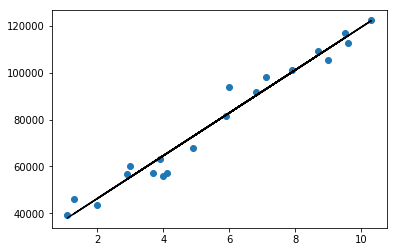

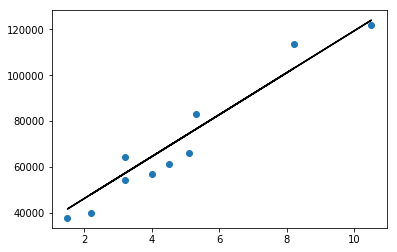

In [49]:
plt.scatter(x, y)
plt.plot(x, m*x +c, c='k')
plt.show()

plt.scatter(x1,y1)
plt.plot(x1, m* x1 +c, c='k')
plt.show()

In [51]:
df_train.loc[:, 'y_hat'] = df_train.loc[:, 'YearsExperience'].values *m +c
df_test.loc[:, 'y_hat'] = df_test.YearsExperience*m +c
print(df_train)
print(df_test)

    YearsExperience  Salary  rand          y_hat
0               1.3   46205     1   39810.585830
1               8.7  109431     2  107550.141223
2               7.1   98273     3   92903.750867
3               3.0   60150     4   55372.375583
4               7.9  101302     5  100226.946045
5               6.0   93940     6   82834.357498
6               9.6  112635     7  115788.735797
7               5.9   81363     8   81918.958101
8               4.0   55794     9   64526.369554
9               2.0   43525    10   46218.381611
10              3.7   57189    11   61780.171363
11              9.5  116969    12  114873.336400
12              2.9   56642    13   54456.976185
13              4.1   57081    14   65441.768952
14              3.9   63218    15   63610.970157
15             10.3  122391    16  122196.531578
16              6.8   91738    17   90157.552676
17              4.9   67938    18   72764.964129
18              9.0  105582    19  110296.339414
19              1.1 

In [52]:
pd.concat((df_train, df_test), axis =0)

,YearsExperience,Salary,rand,y_hat
0,1.3,46205,1,39810.585830
1,8.7,109431,2,107550.141223
2,7.1,98273,3,92903.750867
3,3.0,60150,4,55372.375583
4,7.9,101302,5,100226.946045
5,6.0,93940,6,82834.357498
6,9.6,112635,7,115788.735797
7,5.9,81363,8,81918.958101
8,4.0,55794,9,64526.369554
9,2.0,43525,10,46218.381611


In [63]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df.YearsExperience, df.Salary, test_size = .2, random_state= 3)

In [100]:
obj = LR()
obj.fit(X_train.values.reshape (-1,1), y_train)

LinearRegression()

In [101]:
obj.__dict__

{'_residues': 658199074.937746,
 'coef_': array([9577.14187569]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 24815.35622042013,
 'n_features_in_': 1,
 'n_jobs': None,
 'normalize': False,
 'rank_': 1,
 'singular_': array([13.62295856])}

In [102]:
obj.score(X_test.values.reshape(-1,1), y_test)

0.9200594546911338

In [103]:
y_test

15    122391
5      93940
22     64445
26     56957
18    105582
14     63218
Name: Salary, dtype: int64

In [104]:
X_test*obj.coef_[0] + obj.intercept_

15    123459.917540
5      82278.207475
22     55462.210223
26     63123.923723
18    111009.633102
14     62166.209536
Name: YearsExperience, dtype: float64

In [105]:
s= sum(X_test*obj.coef_[0] + obj.intercept_)

In [106]:
s

497500.1015976507

In [107]:
s1 = sum(y_test)

In [113]:
s1 /s *100

101.81565759953443